## SUCIDES ANALYSIS IN INDIA 

#### Importing Required Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


#### Importing Dataset

In [2]:
data = pd.read_csv(r"D:\PRATIK\Suicides in India 2001-2012.csv\Suicides in India 2001-2012.csv")
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


#### Check missing values

In [4]:
data.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

* No missing values

In [5]:
data.Year.value_counts

<bound method IndexOpsMixin.value_counts of 0         2001
1         2001
2         2001
3         2001
4         2001
          ... 
237514    2012
237515    2012
237516    2012
237517    2012
237518    2012
Name: Year, Length: 237519, dtype: int64>

* We have data from 2001 to 2012

###  Finding How many people commited Sucide from 2001-2012:

In [6]:
data.groupby("Year")["Total"].sum()

Year
2001     976464
2002     993648
2003     997622
2004    1023137
2005    1025201
2006    1062991
2007    1103667
2008    1125082
2009    1144033
2010    1211322
2011    1219499
2012    1189068
Name: Total, dtype: int64

#### Graphical Representation:

<AxesSubplot:xlabel='Year'>

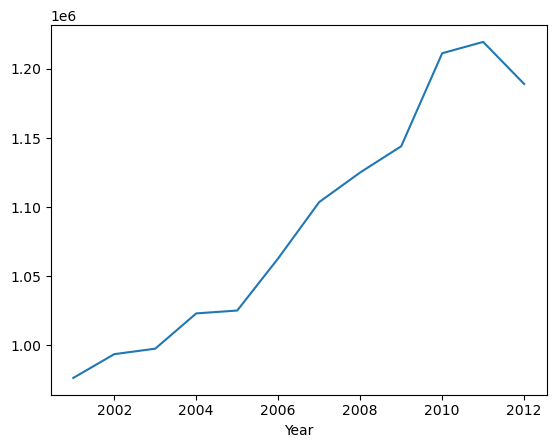

In [7]:
data.groupby("Year")["Total"].sum().plot(kind="line")


* we can see that from the graph that as year increasing the rate of commitment of sucide is increasing

#### merge states with same name but different spelling or redundent state names

In [8]:
data.State.value_counts()

Madhya Pradesh       6792
Maharashtra          6792
Karnataka            6792
Odisha               6791
Andhra Pradesh       6791
Rajasthan            6791
Bihar                6790
Chhattisgarh         6790
Haryana              6790
Kerala               6788
Uttar Pradesh        6787
Assam                6786
Tamil Nadu           6786
Gujarat              6786
Jharkhand            6785
Tripura              6782
Delhi (Ut)           6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Total (All India)     312
Total (States)        312
Total (Uts)           312
Name: State,

In [9]:
data = data[(data["State"]!="Total (States)")&(data["State"]!="Total (Uts)")&(data["State"]!="Total (All India)") ]
data.State.value_counts()

Karnataka            6792
Madhya Pradesh       6792
Maharashtra          6792
Andhra Pradesh       6791
Odisha               6791
Rajasthan            6791
Chhattisgarh         6790
Bihar                6790
Haryana              6790
Kerala               6788
Uttar Pradesh        6787
Tamil Nadu           6786
Gujarat              6786
Assam                6786
Jharkhand            6785
Tripura              6782
Delhi (Ut)           6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Name: State, dtype: int64

#### Genderwise  commitment of sucide:

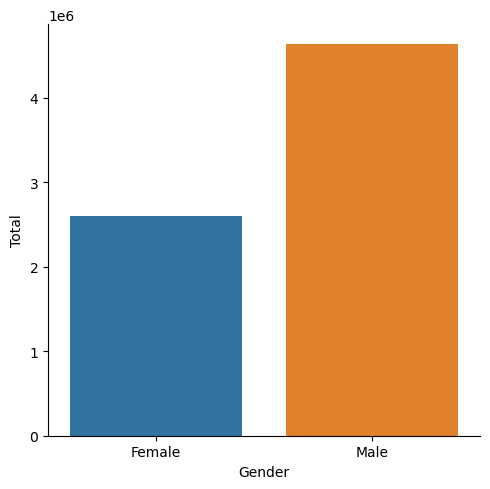

In [12]:
Gender = pd.DataFrame(data.groupby("Gender")["Total"].sum()).reset_index()
sns.catplot(x="Gender", y="Total", kind="bar", data=Gender)

* From the graph we can say that Male commit more sucide than Female

#### Statewise commitment of sucide:

In [13]:
state_cases = pd.DataFrame(data.groupby(["State"])["Total"].sum()).reset_index()
state_cases

,State,Total
0,A & N Islands,8109
1,Andhra Pradesh,814059
2,Arunachal Pradesh,6633
3,Assam,172276
4,Bihar,46214
5,Chandigarh,5164
6,Chhattisgarh,302354
7,D & N Haveli,3430
8,Daman & Diu,1391
9,Delhi (Ut),84272


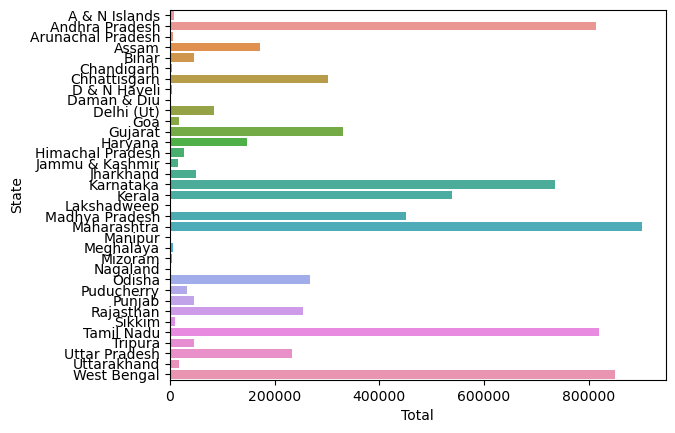

In [14]:
sns.barplot(y = 'State', x = 'Total',data = state_cases)
plt.show()

* In **Maharashtra** most number of people commited sucide

    Approximate 901945 total



### Wordcloud:

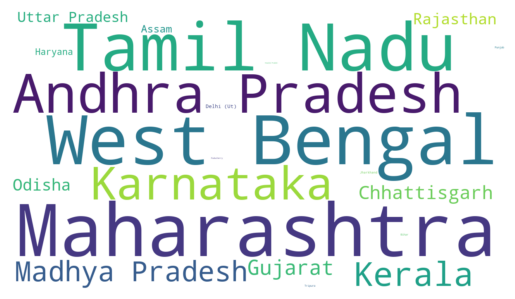

In [15]:
from wordcloud import WordCloud
count = {}
for x in state_cases["State"].values:
    count[x]=int(state_cases[state_cases["State"]==x].Total)

wordcloud = WordCloud(width=1280,
                      height=720,
                      relative_scaling=1,
                      background_color='white',
                      normalize_plurals=False).generate_from_frequencies(count)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

####  Number of cased bases on the reason they had committed suicide

In [18]:
data.Type_code.value_counts()

Causes                  109200
Means_adopted            67200
Professional_Profile     49263
Education_Status          6720
Social_Status             4200
Name: Type_code, dtype: int64

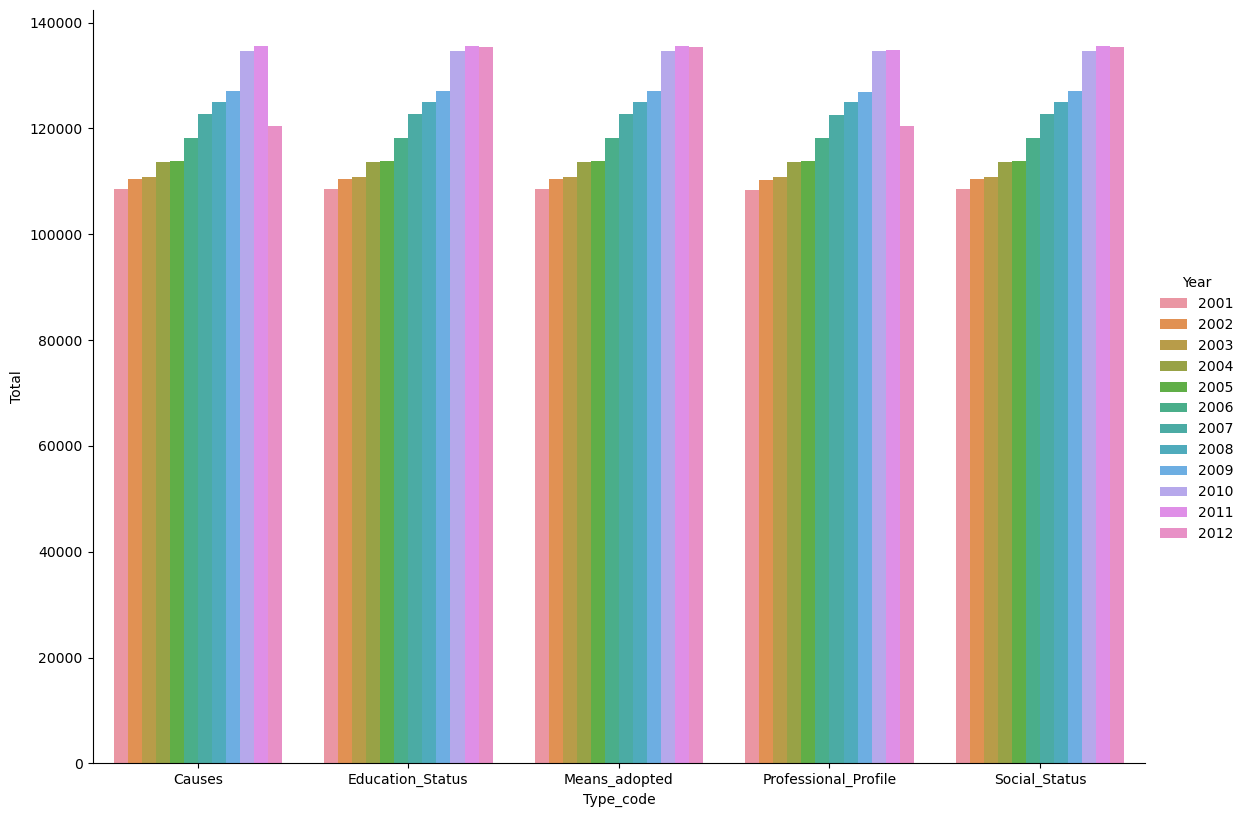

In [19]:
filter_type_code = pd.DataFrame(data.groupby(["Type_code","Year"])["Total"].sum()).reset_index()
filter_type_code
sns.catplot(x="Type_code", y="Total",hue="Year", kind="bar", data=filter_type_code,height=8.27, aspect=11.7/8.27);

#### Finding which Social issues causes more sucide cases:

In [20]:
x = pd.DataFrame(data.Type_code.value_counts()).reset_index()
x

,index,Type_code
0,Causes,109200
1,Means_adopted,67200
2,Professional_Profile,49263
3,Education_Status,6720
4,Social_Status,4200


In [21]:
# Let's visualize on the basis of Social_Status

In [22]:
social_status_data = pd.DataFrame(data[data["Type_code"]=="Social_Status"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
social_status_data

,Type,Gender,Total
0,Divorcee,Female,7692
1,Divorcee,Male,7580
2,Married,Female,356767
3,Married,Male,665007
4,Never Married,Female,115460
5,Never Married,Male,202841
6,Seperated,Female,14165
7,Seperated,Male,24306
8,Widowed/Widower,Female,29929
9,Widowed/Widower,Male,32184


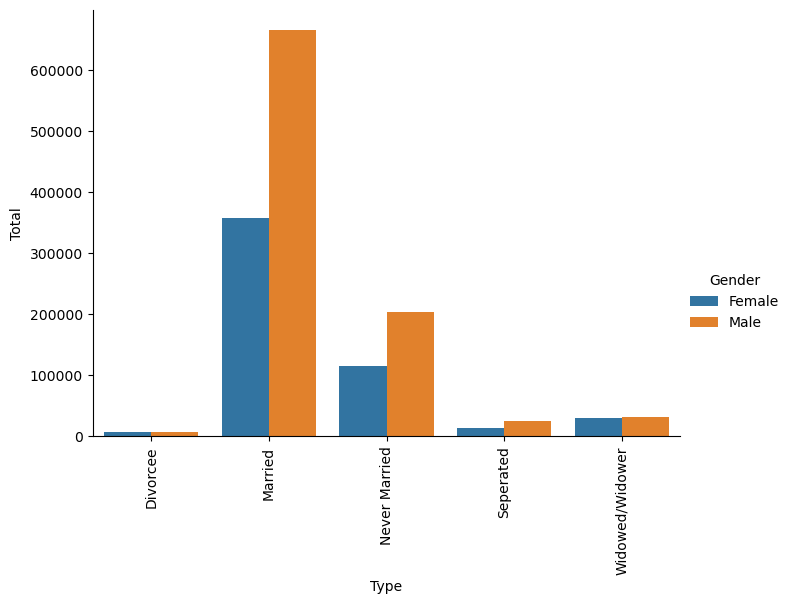

In [23]:
sns.catplot(x="Type", y="Total",hue="Gender", kind="bar", data=social_status_data, height=5, aspect=11.7/8.27).set_xticklabels(rotation=90)

It appears that **married people** count for the majority of suicide cases.

Married **Male** commit more sucide than Female.

#### Education status of people who committed suicides

In [24]:
Education_Status_data = pd.DataFrame(data[data["Type_code"]=='Education_Status'].groupby(["Type","Gender"])["Total"].sum()).reset_index()
Education_Status_data

,Type,Gender,Total
0,Diploma,Female,3734
1,Diploma,Male,10419
2,Graduate,Female,9684
3,Graduate,Male,21590
4,Hr. Secondary/Intermediate/Pre-Universit,Female,39406
5,Hr. Secondary/Intermediate/Pre-Universit,Male,79502
6,Matriculate/Secondary,Female,81940
7,Matriculate/Secondary,Male,174626
8,Middle,Female,117763
9,Middle,Male,225208


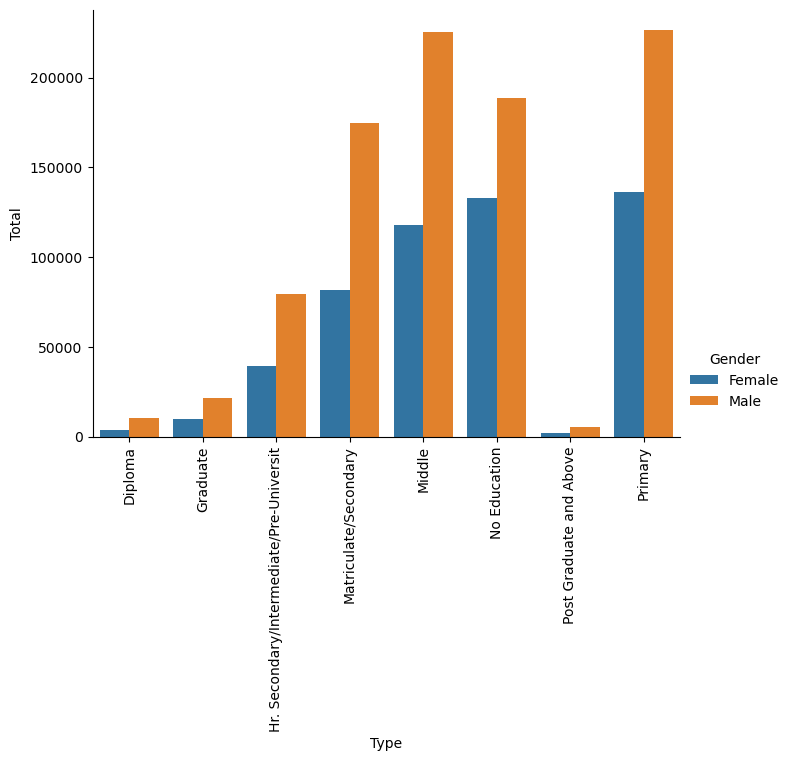

In [25]:
sns.catplot(x="Type", y="Total",hue="Gender", kind="bar", data=Education_Status_data, height=5, aspect=11.7/8.27).set_xticklabels(rotation=90)

It appears that people with low education tend to commit more suicide.

People with Diploma and Graduate tend to commit least no. of suicide

### Profession of the people who committed more suicides

In [26]:
Profession_data = pd.DataFrame(data[data["Type_code"]=="Professional_Profile"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
Profession_data


,Type,Gender,Total
0,Farming/Agriculture Activity,Female,27300
1,Farming/Agriculture Activity,Male,170623
2,House Wife,Female,285243
3,House Wife,Male,0
4,Others (Please Specify),Female,111191
5,Others (Please Specify),Male,357956
6,Professional Activity,Female,3617
7,Professional Activity,Male,35587
8,Public Sector Undertaking,Female,5530
9,Public Sector Undertaking,Male,25256


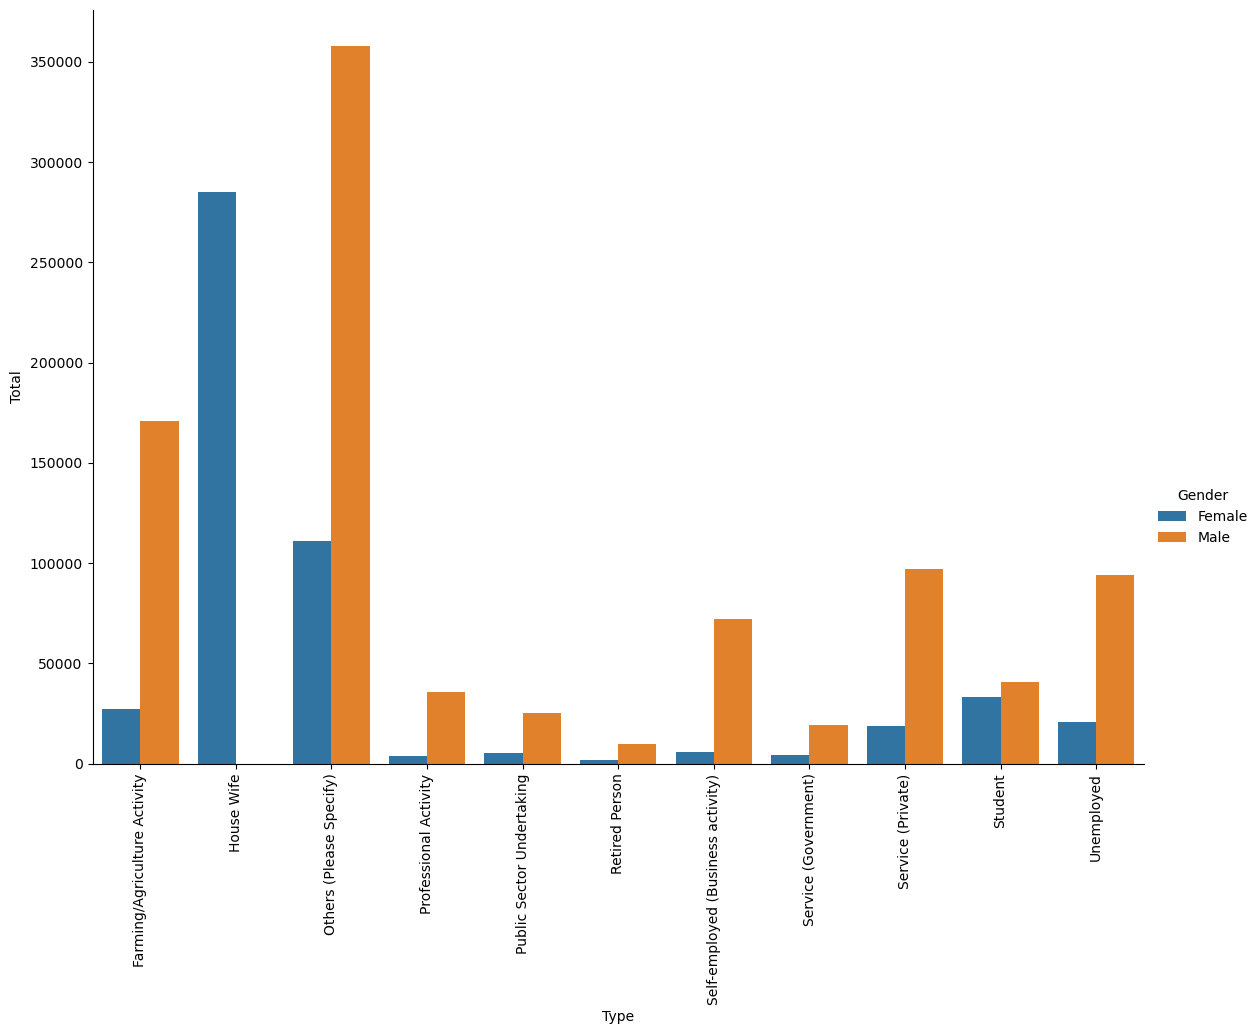

In [27]:
sns.catplot(x="Type", y="Total",hue="Gender", kind="bar", data=Profession_data,height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=90)


**Farmers** and **housewives** tend to commit more suicide compared to others.

probably reason behind farmers sucide:

    > Global warming, monsoon delay, drought etc can lead to bad yield.
    
probably reason behind farmers sucide:

    > Domestic violence, dowry, gender discrimination, etc might be some of the reasons for housewives to commit suicide.

### Age group which commited more sucide

In [28]:
age_data =(data[data["Age_group"]!="0-100+"])

In [29]:
age_data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


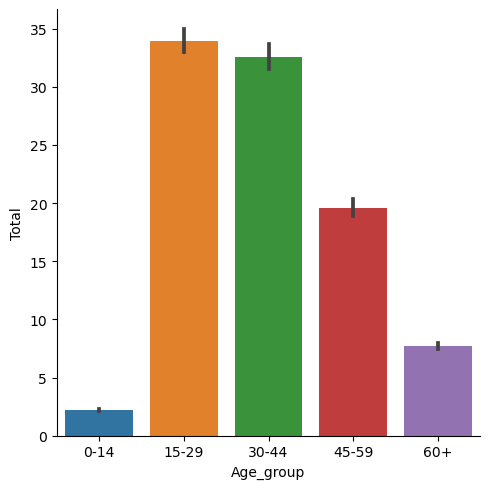

In [30]:
sns.catplot(x="Age_group", y="Total", kind="bar",data=age_data)

**Youngsters** (15-29 age) and **Middle age** (30-44) tend to commit the maximum number of suicides.

It can be due to several reasons like:
* unemployment
* academic stress
* bad friend circle
* addictions
*  Global warming, monsoon delay, drought etc can lead to bad yield(considering farmers)

# Conclusion

* Males tend to commit more suicides compared to Females in India
* Highest no. of suicide cases occur in **Maharashtra, West Bengal, and Tamil Nadu**.
* Male might commit more suicide compared to females in the future if this trend continues.
* People who commit suicide are mostly:
    * Married
    * Farmers and housewives
    * Youngsters (15-29 age) and middle age (30-44)